In [1]:
import numpy as np
import matplotlib as plt
from datascience import*
%matplotlib inline 
plt.style.use('fast')
from scipy import misc as misc
import mpmath as mp
import math

In [2]:
# part c
omega =  0.005012
time = np.linspace(0,2400,1000)
autocorrfunction = []
for i in time:
    x = omega*(i)
    cosh = 0.5 * ( np.exp(x) + np.exp(-1*x) )
    value = 1 / (np.sqrt(cosh))
    autocorrfunction.append(value)

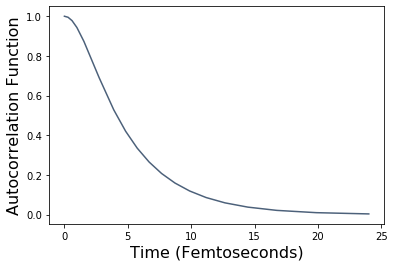

In [3]:
Table().with_columns("Time (Femtoseconds)",time*10e-3,"Autocorrelation Function", autocorrfunction).plot(0)

In [4]:
mp.prec = 14

In [5]:
#part d
omega =  0.005012
energy = np.linspace(-0.015,0.015,300)
L_omega = []
for i in energy:
    a = 1/2
    b1 =  ((omega) - (2* 1j * (i) )) / (4 * omega)
    c1 = (5/4) - (( 1j * (i) )/(2 * omega))
    d = -1
    b2 = ( omega + (2 * 1j * (i) ) ) / (4 * omega)
    c2 = (5/4) + (( 1j * (i) )/(2 * omega))
    F11 = mp.hyp2f1(a,b1,c1,d)
    hypergeometricF11 = mp.fp.mpc(F11)
    F22 = mp.hyp2f1(a,b2,c2,d)
    hypergeometricF22 = mp.fp.mpc(F22)
    left_hand_side = hypergeometricF11 / (omega - (2 * 1j * (i)))
    Right_hand_side = hypergeometricF22 / (omega + (2 * 1j * (i)))
    Lw = (np.sqrt(2)/ np.pi) * (left_hand_side + Right_hand_side)
    L_omega.append(Lw)

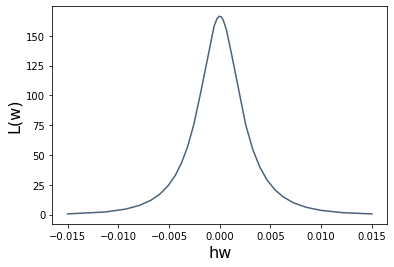

In [6]:
Table().with_columns("hw",energy,"L(w)", np.real(L_omega)).plot(0)

In [7]:
# part e 
m1 = 1822.89*16
w = 0.0060736
beta = np.sqrt(m1*w)
b = 0.25

An = []
for n in np.arange(0,21):
    one = (beta*b)**(n)
    two = (2** (n/2) ) * (np.sqrt (math.factorial(n) ))
    exponent = np.exp( (- (beta*b)**2 ) /4 )
    an = (one/two) * exponent
    An.append(an)

In [8]:
FC = np.array(An)
FC_factors = FC**2

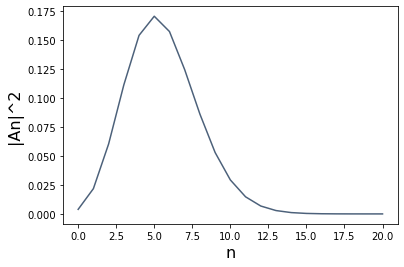

In [9]:
Table().with_columns("n",np.arange(0,21),"|An|^2", FC_factors).plot(0)

In [26]:
# part e

In [27]:
np.arange(0,21)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [28]:

w = 0.0060736


wk = np.linspace(0.318943,0.382732,300)


omega = 0.005012

In [29]:

cross_section = []
for i in wk:
    sigma = 0
    for n in np.arange(0,21):
        # these are the Frank codon factors 
        En =  ( (n + (1/2)) * w ) + 0.32

        Lw_function_input = i - En
    

        a = 1/2
        b1 =  ((omega) - (2* 1j * (Lw_function_input) )) / (4 * omega)
        c1 = (5/4) - (( 1j * (Lw_function_input) )/(2 * omega))
        d = -1
        b2 = ( omega + (2 * 1j * (Lw_function_input) ) ) / (4 * omega)
        c2 = (5/4) + (( 1j * (Lw_function_input) )/(2 * omega))
        F11 = mp.hyp2f1(a,b1,c1,d)
        hypergeometricF11 = mp.fp.mpc(F11)
        F22 = mp.hyp2f1(a,b2,c2,d)
        hypergeometricF22 = mp.fp.mpc(F22)
        left_hand_side = hypergeometricF11 / (omega - (2 * 1j * (Lw_function_input)))
        Right_hand_side = hypergeometricF22 / (omega + (2 * 1j * (Lw_function_input)))
        lw = np.real ( (np.sqrt(2)/ np.pi) * (left_hand_side + Right_hand_side) )


        wsigmaw = FC_factors[n]*lw*i
        sigma = sigma + wsigmaw 
    cross_section.append(sigma)

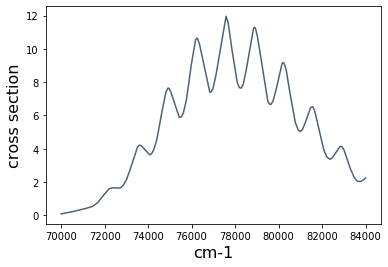

In [30]:
Table().with_columns("cm-1",wk*2.1947463136320e5  ,"cross section", np.real(cross_section)).plot(0)

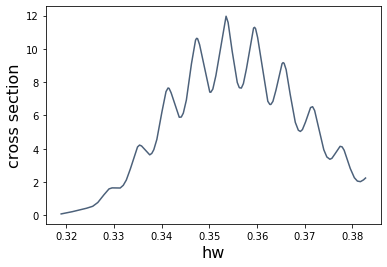

In [31]:
Table().with_columns("hw",wk  ,"cross section", np.real(cross_section)).plot(0)

In [32]:
# part f

In [33]:
double_omega = 2*omega
cross_section_double_omega = []
for i in wk:
    sigma = 0
    for n in np.arange(0,21):
        # these are the Frank codon factors 
        En =  ( (n + (1/2)) * w ) + 0.32

        Lw_function_input = i - En
    

        a = 1/2
        b1 =  ((double_omega) - (2* 1j * (Lw_function_input) )) / (4 * double_omega)
        c1 = (5/4) - (( 1j * (Lw_function_input) )/(2 * double_omega))
        d = -1
        b2 = ( double_omega + (2 * 1j * (Lw_function_input) ) ) / (4 * double_omega)
        c2 = (5/4) + (( 1j * (Lw_function_input) )/(2 * double_omega))
        F11 = mp.hyp2f1(a,b1,c1,d)
        hypergeometricF11 = mp.fp.mpc(F11)
        F22 = mp.hyp2f1(a,b2,c2,d)
        hypergeometricF22 = mp.fp.mpc(F22)
        left_hand_side = hypergeometricF11 / (omega - (2 * 1j * (Lw_function_input)))
        Right_hand_side = hypergeometricF22 / (omega + (2 * 1j * (Lw_function_input)))
        lw = np.real ( (np.sqrt(2)/ np.pi) * (left_hand_side + Right_hand_side) )


        wsigmaw = FC_factors[n]*lw*i
        sigma = sigma + wsigmaw 
    cross_section_double_omega.append(sigma)

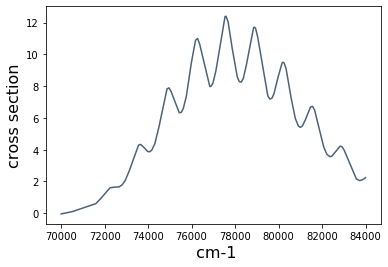

In [44]:
Table().with_columns(" cm-1", wk*2.1947463136320e5  ,"cross section", np.real(cross_section_double_omega)).plot(0)

In [35]:
half_omega = omega/2
cross_section_half_omega = []
for i in wk:
    sigma = 0
    for n in np.arange(0,21):
        # these are the Frank codon factors 
        En =  ( (n + (1/2)) * w ) + 0.32

        Lw_function_input = i - En
    

        a = 1/2
        b1 =  ((half_omega) - (2* 1j * (Lw_function_input) )) / (4 * half_omega)
        c1 = (5/4) - (( 1j * (Lw_function_input) )/(2 * half_omega))
        d = -1
        b2 = ( half_omega + (2 * 1j * (Lw_function_input) ) ) / (4 * half_omega)
        c2 = (5/4) + (( 1j * (Lw_function_input) )/(2 * half_omega))
        F11 = mp.hyp2f1(a,b1,c1,d)
        hypergeometricF11 = mp.fp.mpc(F11)
        F22 = mp.hyp2f1(a,b2,c2,d)
        hypergeometricF22 = mp.fp.mpc(F22)
        left_hand_side = hypergeometricF11 / (half_omega - (2 * 1j * (Lw_function_input)))
        Right_hand_side = hypergeometricF22 / (half_omega + (2 * 1j * (Lw_function_input)))
        lw = np.real ( (np.sqrt(2)/ np.pi) * (left_hand_side + Right_hand_side) )


        wsigmaw = FC_factors[n]*lw*i
        sigma = sigma + wsigmaw 
    cross_section_half_omega.append(sigma)

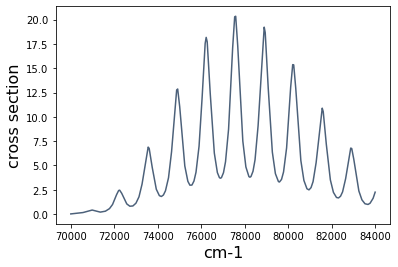

In [36]:
Table().with_columns("cm-1",wk*2.1947463136320e5  ,"cross section", np.real(cross_section_half_omega)).plot(0)

In [37]:
m1 = 1822.89*16
w = 0.0060736
beta = np.sqrt(m1*w)
b2 = 0.3

In [38]:
An2 = []
for n in np.arange(0,21):
    one = (beta*b2)**(n)
    two = (2** (n/2) ) * (np.sqrt (math.factorial(n) ))
    exponent = np.exp( (- (beta*b2)**2 ) /4 )
    an = (one/two) * exponent
    An2.append(an)

In [39]:
FC2 = np.array(An2)
FC_factors2 = FC2**2

In [40]:
doubleb = []
for i in wk:
    sigma = 0
    for n in np.arange(0,21):
        # these are the Frank codon factors 
        En =  ( (n + (1/2)) * w ) + 0.32

        Lw_function_input = i - En
    

        a = 1/2
        b1 =  ((omega) - (2* 1j * (Lw_function_input) )) / (4 * omega)
        c1 = (5/4) - (( 1j * (Lw_function_input) )/(2 * omega))
        d = -1
        b2 = ( omega + (2 * 1j * (Lw_function_input) ) ) / (4 * omega)
        c2 = (5/4) + (( 1j * (Lw_function_input) )/(2 * omega))
        F11 = mp.hyp2f1(a,b1,c1,d)
        hypergeometricF11 = mp.fp.mpc(F11)
        F22 = mp.hyp2f1(a,b2,c2,d)
        hypergeometricF22 = mp.fp.mpc(F22)
        left_hand_side = hypergeometricF11 / (omega - (2 * 1j * (Lw_function_input)))
        Right_hand_side = hypergeometricF22 / (omega + (2 * 1j * (Lw_function_input)))
        lw = np.real ( (np.sqrt(2)/ np.pi) * (left_hand_side + Right_hand_side) )


        wsigmaw = FC_factors2[n]*lw*i
        sigma = sigma + wsigmaw 
    doubleb.append(sigma)

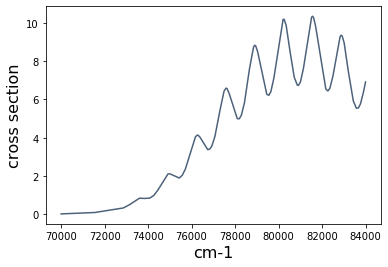

In [41]:
Table().with_columns("cm-1",wk*2.1947463136320e5  ,"cross section", np.real(doubleb)).plot(0)